Found 245 images belonging to 3 classes.
Found 61 images belonging to 3 classes.
Class labels: ['Baguette', 'Maltese loaf', 'Packaged Loaf']
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.5475 - loss: 1.3046 - val_accuracy: 0.9672 - val_loss: 0.1427
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.9074 - loss: 0.2129 - val_accuracy: 0.9836 - val_loss: 0.0603
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.9800 - loss: 0.0660 - val_accuracy: 0.9508 - val_loss: 0.1241
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.9957 - loss: 0.0185 - val_accuracy: 0.9836 - val_loss: 0.0258
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.9977 - loss: 0.0192 - val_accuracy: 0.9672 - val_loss: 0.0860
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.9829 - loss: 0.0307 - val_accuracy: 0.9836 - val_loss: 0.0317
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.9932 - loss: 0.0155 - val_accuracy: 0.9672 - val_loss: 0.0972
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 1.0000 - loss: 0.0104 - val_accuracy: 1.0000 - val_loss:

✅ Model saved as bread_model.h5


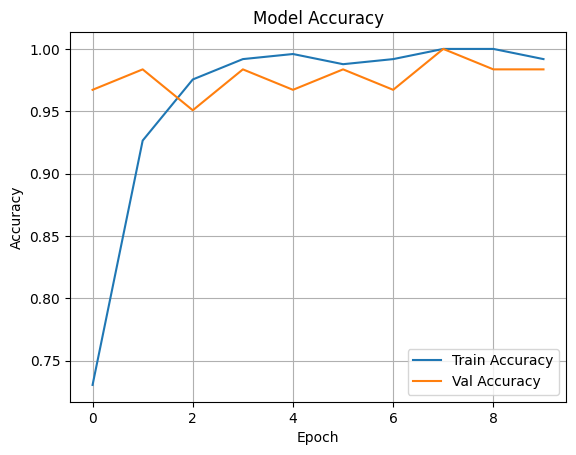

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import os

# ======== Parameters ========
img_size = (224, 224)
batch_size = 16
epochs = 10
dataset_dir = 'dataset'

# ======== Data Generators ========
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2
)

train_gen = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

class_names = list(train_gen.class_indices.keys())
print("Class labels:", class_names)

# ======== Build Model (Transfer Learning) ========
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base layers initially

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(class_names), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# ======== Train Model ========
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs
)

# ======== Save Model ========
model.save('bread_model.h5')
print("✅ Model saved as bread_model.h5")

# ======== Plot Accuracy ========
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("bread_model.h5")

# Set up the data generator with validation split
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load validation data (must match training setup)
validation_data = datagen.flow_from_directory(
    '../Dataset',           # 👈 replace this with your dataset path
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Predict class probabilities
y_pred_probs = model.predict(validation_data)
y_pred = np.argmax(y_pred_probs, axis=1)

# True labels
y_true = validation_data.classes

# Get class names in correct order
class_names = list(validation_data.class_indices.keys())

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Bread Identifier")
plt.show()


<>:15: SyntaxWarning: invalid escape sequence '\D'
<>:15: SyntaxWarning: invalid escape sequence '\D'
C:\Users\kylec\AppData\Local\Temp\ipykernel_7912\2872451155.py:15: SyntaxWarning: invalid escape sequence '\D'
  '.\Dataset',           # 👈 replace this with your dataset path
C:\Users\kylec\AppData\Local\Temp\ipykernel_7912\2872451155.py:15: SyntaxWarning: invalid escape sequence '\D'
  '.\Dataset',           # 👈 replace this with your dataset path


FileNotFoundError: [WinError 3] The system cannot find the path specified: '.\\Dataset'

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import tensorflow as tf

# ======= Load Model and Class Labels ========
model = tf.keras.models.load_model('bread_model.h5')  # Make sure this file exists in the same directory
classes = ['baguette', 'maltese loaf', 'packaged loaf']

# ======= Init MediaPipe Hands ========
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# ======= Bread Classifier Function ========
def classify_bread(image, model):
    img = cv2.resize(image, (224, 224)) / 255.0
    img = np.expand_dims(img, axis=0)
    preds = model.predict(img)
    class_idx = np.argmax(preds)
    return classes[class_idx], preds[0][class_idx]

# ======= Open Webcam ========
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Cannot open webcam.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # --- Hand Detection ---
    hand_results = hands.process(frame_rgb)
    hands_present = hand_results.multi_hand_landmarks is not None

    # --- Bread Classification ---
    bread_type, confidence = classify_bread(frame, model)

    # --- Draw classification result ---
    label = f"Bread: {bread_type} ({confidence:.2f})"
    cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    # --- Draw hands if present ---
    if hands_present:
        for hand_landmarks in hand_results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    # --- Alert logic ---
    if hands_present and bread_type != "packaged loaf":
        alert = "⚠️ ALERT: Hand touching unpackaged bread!"
        cv2.putText(frame, alert, (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
        print(alert)

    # --- Show live feed ---
    cv2.imshow("Bread + Hand Detector", frame)

    # --- Exit on 'q' key ---
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# ======= Cleanup ========
cap.release()
cv2.destroyAllWindows()
